# 1. Set-up

## Install required packages

In [ ]:
!pip install geopandas
!pip install Shapely

In [2]:
import pandas as pd
import geopandas as gpd
import requests
import pathlib
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon
from shapely.geometry import MultiLineString
from shapely.ops import split
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Set filepaths

In [11]:
path = pathlib.Path().resolve()
INPUT_FILEPATH = path / "data"
OUTPUT_FILEPATH = path / "data" / "outputs"

# 2. Download AFDC Data and Convert to Geodataframe

In [4]:
api_key = "SEieCj3uYQ3ufDsCqFWAfw56GvXKyLr1YTt9K4Sv"
base_url = "https://developer.nrel.gov/api/alt-fuel-stations/v1"
download_format = "csv"
state = "CT"
fuel_type = "ELEC"

In [5]:
download_URL = base_url + "." + download_format + "?" + "api_key=" + api_key + "&" + "state=" + state + "&" + "fuel_type=" + fuel_type

In [9]:
# Download
data_df = pd.read_csv(download_URL)

In [10]:
# Save
data_df.to_csv(OUTPUT_FILEPATH /"afdc_ct_charging_points.csv")

In [97]:
# Load
data_df = pd.read_csv(OUTPUT_FILEPATH /"afdc_ct_charging_points.csv")

## Convert to GeoDataFrame

In [98]:
# geometry column must contain Point objects
geometry = [Point(x,y) for y,x in zip(data_df["Latitude"],data_df["Longitude"])]

In [99]:
# Show what one element looks like
list(geometry[0].coords)

[(-73.240315, 41.157925)]

In [100]:
# Create a new GeoDataFrame, set its geometry column
data_df_geo = data_df.copy()
data_df_geo["geometry"] = geometry

# Drop latitude and longitude, now superfluous columns
data_df_geo.drop(["Latitude","Longitude"], axis=1)

,Unnamed: 0,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,...,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,geometry
0,0,ELEC,Whole Foods Market,350 Grasmere Ave,NaN,Fairfield,CT,6824,NaN,203-319-9544,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,POINT (-73.240315 41.157925)
1,1,ELEC,Propark America - Omni Hotel Chapel Square Garage,155 Temple St,Located on first floor of garage,New Haven,CT,6510,NaN,203-781-8030,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-72.927405 41.305794)
2,2,ELEC,New London Parking Authority - Water Street Pu...,161 Water St,Located outside off entrance from Water St and...,New London,CT,6320,NaN,860-443-1775,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,POINT (-72.093784 41.355486)
3,3,ELEC,Town of Westport - Westport Metro North,1 Railroad Pl,Eastbound Westport Saugatuck Train Station,Westport,CT,6880,NaN,203-341-1000,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.369266 41.119291)
4,4,ELEC,Park 'N Fly - Bradley International Airport,1186 South St,NaN,Suffield,CT,6078,NaN,800-218-1297,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,POINT (-72.663078 41.951328)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,797,ELEC,The Residence at Westport,1141 Post Road East,NaN,Westport,CT,6880,NaN,888-998-2546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.3249555 41.1393568)
798,798,ELEC,Pierpont at City Crossing,9 Tower Lane,NaN,New Haven,CT,6519,NaN,888-998-2546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-72.928985 41.3004413)
799,799,ELEC,STEPHEN TOYOTA FRONT CT4000,1097 Farmington Ave,NaN,Bristol,CT,6010,NaN,888-758-4389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-72.908117 41.696544)
800,800,ELEC,Sunoco,884 State St,NaN,New Haven,CT,6511,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,POINT (-72.91262 41.31404)


In [101]:
# Create the GeoDataFrame
data_df_geo = GeoDataFrame(data_df_geo,crs = "WGS84", geometry=geometry)

In [102]:
# Save the geodataframe
# data_df_geo.to_file(OUTPUT_FILEPATH / "afdc_ct_charging_points.gpkg")

# Load the dataframe
data_df_geo = gpd.read_file(OUTPUT_FILEPATH / "afdc_ct_charging_points.gpkg")

# 3. Load CT Shapefile

In [17]:
# Load all US States
us_gdf = gpd.read_file(INPUT_FILEPATH / "us_state_shapefiles")

In [18]:
# Restrict to CT
ct_gdf = us_gdf[us_gdf["NAME"] == "Connecticut"]

In [34]:
# Reset the index
ct_gdf_2 = ct_gdf.reset_index()

In [35]:
ct_gdf_2 = ct_gdf_2.drop('index', axis =1)

# 4. Plot CT Shapefile with Fast Charger Points

NameError: name 'data_df_geo' is not defined

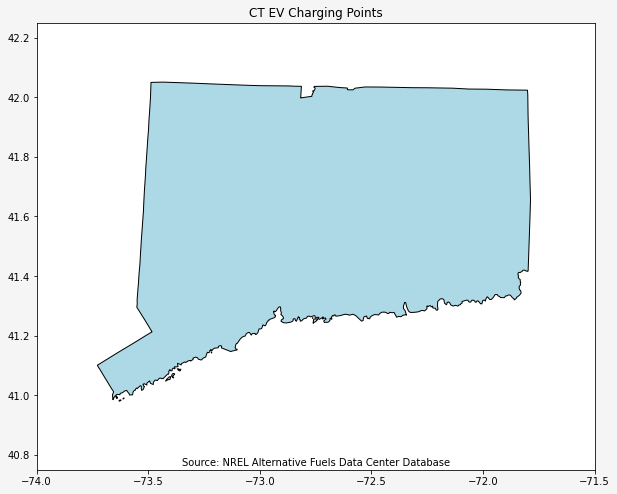

In [36]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,10), facecolor = 'whitesmoke')

# Set axes sizes
ax.set_ylim(40.75, 42.25)
ax.set_xlim(-74, -71.5)
ax.set_title("CT EV Charging Points")
plt.text(s = "Source: NREL Alternative Fuels Data Center Database",
         x = 0.5,
         y= 0.01,
         transform=ax.transAxes,
         horizontalalignment='center')
# Alternative
# ax.annotate("Source: NREL Alternative Fuels Data Center Database",
#             xy=(0.5, 0.01),
#             xytext=(0.25, 0.08),
#             xycoords = 'figure fraction')

# Plot state and points
ct_gdf_2.plot(ax=ax, color = 'lightblue', edgecolor = 'black')
data_df_geo.plot(ax=ax, 
                 color = 'darkblue', 
                 markersize =10)

# 5. Add roads

In [37]:
# Add state routes
# Source: https://geodata.ct.gov/maps/5e334f57a37f4eaa970b0ee5a52624d0/about
state_routes = gpd.read_file(INPUT_FILEPATH / "CTDOT_State_Routes_and_Local_Roads.geojson")

# Source: https://geodata.ct.gov/maps/5e334f57a37f4eaa970b0ee5a52624d0/about
local_roads = gpd.read_file(INPUT_FILEPATH / "CTDOT_State_Routes_and_Local_Roads_LOCAL")

# Source: https://geodata.ct.gov/datasets/b878865b7c4e4d858fbddf92ed4e1c28_0/explore
interstates = gpd.read_file(INPUT_FILEPATH / "Connecticut_Routes.geojson")
# Remove state routes for duplication
interstates = interstates[interstates["ROUTECLASS"]!="State Route"]

In [25]:
# Ramps
# Source: https://connecticut-ctdot.opendata.arcgis.com/apps/76c04dd1fb5b4933a0aefa12c632457c/explore
ramps = gpd.read_file(INPUT_FILEPATH / "ramps.geojson")

In [26]:
# Reproject to use the same coordinate system
state_routes= state_routes.to_crs(ct_gdf_2.crs)
local_roads = local_roads.to_crs(state_routes.crs)
interstates = interstates.to_crs(state_routes.crs)
ramps = ramps.to_crs(state_routes.crs)

Text(0.5, 0.01, 'Source: NREL Alternative Fuels Data Center Database')

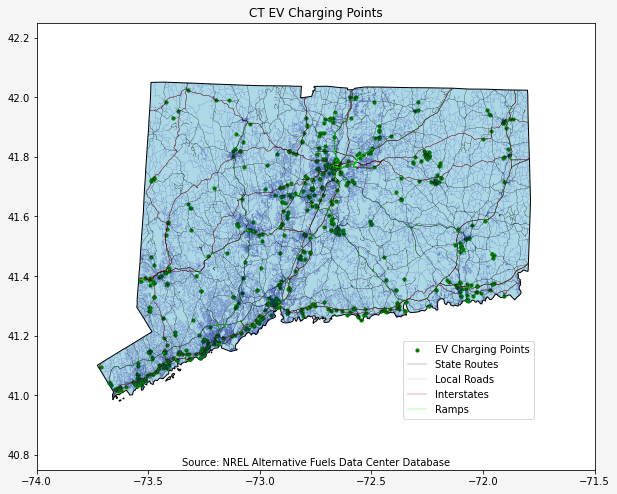

In [27]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,10), facecolor = 'whitesmoke')

# Set axes sizes
ax.set_ylim(40.75, 42.25)
ax.set_xlim(-74, -71.5)

# Plot state and points
# Plot state boundaries
ct_gdf_2.plot(ax=ax, color = 'lightblue', edgecolor = 'black')

# Plot DCFC points
afdc_plot = data_df_geo.plot(ax=ax, 
                color = 'green', 
                markersize =10,
                label = "EV Charging Points")

# Plot state routes
state_routes_plot = state_routes.plot(ax=ax, color = 'black', linewidth = 0.25, label = "State Routes")

# Plot local roads
local_roads_plot = local_roads.plot(ax=ax, color = 'darkblue', linewidth = 0.1, label = "Local Roads")

# Plot interstates and US routes
interstates_plot = interstates.plot(ax=ax, color ='darkred', linewidth = 0.3, label = "Interstates")

# Plot ramps
ramps_plot = ramps.plot(ax=ax, color='lime', linewidth = 0.3, label = "Ramps")

# We get our handles and labels
handles, labels = ax.get_legend_handles_labels()

# Choose to place this within the figure, not within the axes
ax.legend(handles, labels, loc = 'upper right', bbox_to_anchor = (0.9, 0.3))

ax.set_title("CT EV Charging Points")
plt.text(s = "Source: NREL Alternative Fuels Data Center Database",
         x = 0.5,
         y= 0.01,
         transform=ax.transAxes,
         horizontalalignment='center')

# 6 Add counties

In [28]:
# Import shapefile of CT counties
# Source: https://catalog.data.gov/dataset/tiger-line-shapefile-2019-state-connecticut-current-county-subdivision-state-based
counties_shapefile = gpd.read_file(INPUT_FILEPATH / "ct_counties_shapefile")

# Make it the same CRS
counties_shapefile = counties_shapefile.to_crs(state_routes.crs)

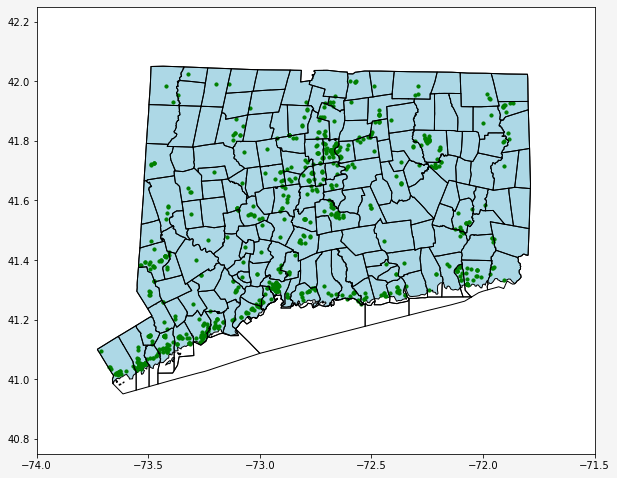

In [29]:
# Plot these
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,10), facecolor = 'whitesmoke')

# Set axes sizes
ax.set_ylim(40.75, 42.25)
ax.set_xlim(-74, -71.5)

# Plot state and points
# Plot state boundaries
ct_gdf_2.plot(ax=ax, color = 'lightblue', edgecolor = 'black')

# Plot DCFC points
afdc_plot = data_df_geo.plot(ax=ax, 
                color = 'green', 
                markersize =10,
                label = "EV Charging Points")

# Plot county subdivisions
counties_sub_plot = counties_shapefile.plot(ax=ax,
                    edgecolor = 'black',
                    facecolor = 'none')

plt.show()

In [ ]:
# Now join the census data to the counties
census_data_s1901 = pd.read_csv(INPUT_FILEPATH/ "S1901_CT.csv")

In [31]:
# Convert the shapefile countyfp to numeric
counties_shapefile["COUNTYFP"] = pd.to_numeric(counties_shapefile["COUNTYFP"])

In [32]:
# Join the data
ct_counties_joined = counties_shapefile.merge(census_data_s1901, left_on = "COUNTYFP", right_on = "county")

# Output: Chargers and Mean County Income

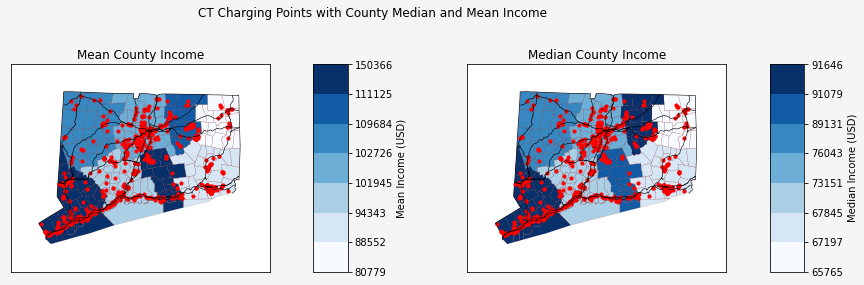

In [114]:
# Map
# Plot these
# Create figure and axes
fig, axs = plt.subplots(nrows=1, ncols= 2, figsize = (15,5), facecolor = 'whitesmoke')

# Create separate axes for colorbars
caxs = [None, None]

# Create a title
fig.suptitle("CT Charging Points with County Median and Mean Income", x= 0.5, y = 0.95)

def create_axis(index, metric):
    ax = axs[index]
    caxs[index] = make_axes_locatable(ax)
    cax = caxs[index].append_axes("right", size = "10%", pad = "0%")
    
    # Divide
    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes("bottom", size = "4%", pad = 0)

    # Set axes sizes
    ax.set_title(f"{metric} County Income")
    ax.set_ylim(40.75, 42.25)
    ax.set_xlim(-74, -71.5)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xmargin(0)
    ax.set_ymargin(0)

    # Create a colormap
    cmap = plt.cm.Blues
    norm = colors.BoundaryNorm(sorted(ct_counties_joined[metric].unique()), cmap.N)

    # Plot state and points
    # Plot state boundaries
    ct_gdf_2.plot(ax=ax,
                  cax=cax,
                  color = 'lightblue',
                  edgecolor = 'black')

    # Plot the counties
    # Legend_kwds are passed to a matplotlib.pyplot.colorbar() object, so they must match those
    # Found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
    ct_counties_joined.plot(ax=ax,
                            column = metric,
                            cax=cax,
                            cmap = cmap, norm=norm, legend = True,
                            legend_kwds={"label": f"{metric} Income (USD)",
                                        "pad" : 0,
                                        "orientation" : "vertical"})
    # Plot DCFC points
    afdc_plot = data_df_geo.plot(ax=ax, cax=cax,
                    color = 'red', 
                    markersize =10,
                    label = "EV Charging Points")

    # Plot county subdivisions
    counties_sub_plot = counties_shapefile.plot(ax=ax, cax=cax,
                        edgecolor = 'darkred',
                        facecolor = 'none',
                        linewidth = 0.1)


    # Plot state routes
    # state_routes_plot = state_routes.plot(ax=ax, color = 'black', linewidth = 0.25, label = "State Routes")

    # Plot local roads
    # local_roads_plot = local_roads.plot(ax=ax, color = 'darkblue', linewidth = 0.1, label = "Local Roads")

    # Plot interstates and US routes
    interstates_plot = interstates.plot(ax=ax, cax=cax, color ='black', linewidth = 0.6, label = "Interstates")

create_axis(0, "Mean")
create_axis(1, "Median")

# Set the figure title
# plt.title("CT Charging Stations with Mean and Median Income")

plt.show()

***
# Old

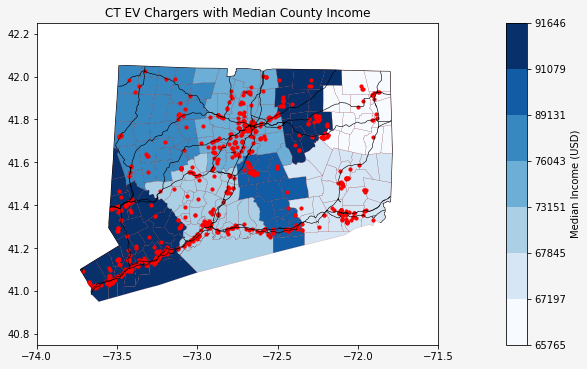

In [35]:
# Map
# Plot these
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,10), facecolor = 'whitesmoke')


# Split them
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "4%", pad = 0)

# Set axes sizes
ax.set_title("CT EV Chargers with Median County Income")
ax.set_ylim(40.75, 42.25)
ax.set_xlim(-74, -71.5)

# Create a colormap
cmap = plt.cm.Blues
norm = colors.BoundaryNorm(sorted(ct_counties_joined["Median"].unique()), cmap.N)

# Plot state and points
# Plot state boundaries
ct_gdf_2.plot(ax=ax,
              cax=cax,
              color = 'lightblue',
              edgecolor = 'black')

# Plot the counties
# Legend_kwds are passed to a matplotlib.pyplot.colorbar() object, so they must match those
# Found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ct_counties_joined.plot(ax=ax,
                        column = "Median",
                        cax=cax,
                        cmap = cmap, norm=norm, legend = True,
                        legend_kwds={"label": "Median Income (USD)",
                                    "pad" : 0})
# Plot DCFC points
afdc_plot = data_df_geo.plot(ax=ax, cax=cax,
                color = 'red', 
                markersize =10,
                label = "EV Charging Points")

# Plot county subdivisions
counties_sub_plot = counties_shapefile.plot(ax=ax, cax=cax,
                    edgecolor = 'darkred',
                    facecolor = 'none',
                    linewidth = 0.1)


# Plot state routes
# state_routes_plot = state_routes.plot(ax=ax, color = 'black', linewidth = 0.25, label = "State Routes")

# Plot local roads
# local_roads_plot = local_roads.plot(ax=ax, color = 'darkblue', linewidth = 0.1, label = "Local Roads")

# Plot interstates and US routes
interstates_plot = interstates.plot(ax=ax, cax=cax, color ='black', linewidth = 0.6, label = "Interstates")

plt.show()



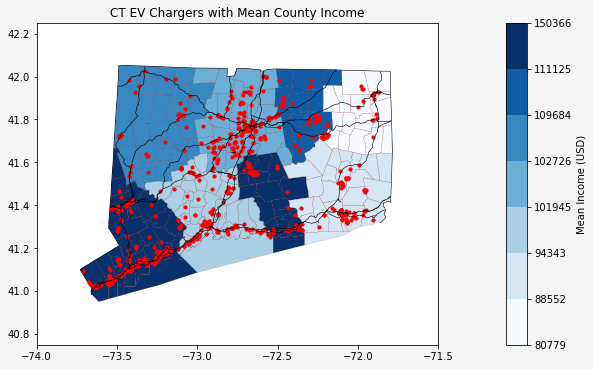

In [33]:
# Map
# Plot these
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,10), facecolor = 'whitesmoke')


# Split them
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "4%", pad = 0)

# Set axes sizes
ax.set_title("CT EV Chargers with Mean County Income")
ax.set_ylim(40.75, 42.25)
ax.set_xlim(-74, -71.5)

# Create a colormap
cmap = plt.cm.Blues
norm = colors.BoundaryNorm(sorted(ct_counties_joined["Mean"].unique()), cmap.N)

# Plot state and points
# Plot state boundaries
ct_gdf_2.plot(ax=ax,
              cax=cax,
              color = 'lightblue',
              edgecolor = 'black')

# Plot the counties
# Legend_kwds are passed to a matplotlib.pyplot.colorbar() object, so they must match those
# Found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
ct_counties_joined.plot(ax=ax,
                        column = "Mean",
                        cax=cax,
                        cmap = cmap, norm=norm, legend = True,
                        legend_kwds={"label": "Mean Income (USD)",
                                    "pad" : 0})
# Plot DCFC points
afdc_plot = data_df_geo.plot(ax=ax, cax=cax,
                color = 'red', 
                markersize =10,
                label = "EV Charging Points")

# Plot county subdivisions
counties_sub_plot = counties_shapefile.plot(ax=ax, cax=cax,
                    edgecolor = 'darkred',
                    facecolor = 'none',
                    linewidth = 0.1)


# Plot state routes
# state_routes_plot = state_routes.plot(ax=ax, color = 'black', linewidth = 0.25, label = "State Routes")

# Plot local roads
# local_roads_plot = local_roads.plot(ax=ax, color = 'darkblue', linewidth = 0.1, label = "Local Roads")

# Plot interstates and US routes
interstates_plot = interstates.plot(ax=ax, cax=cax, color ='black', linewidth = 0.6, label = "Interstates")

plt.show()



# Plotting EV Purchase data

### Data Preparation

First, import EV purchases (see `vehicle_data.ipynb`)

In [26]:
ev_purchases_zip = pd.read_csv(OUTPUT_FILEPATH / "vehicle_sales_by_zip_fueltype.csv")
ev_purchases_zip_pctg = pd.read_csv(OUTPUT_FILEPATH / "by_zip_fueltype_percentage.csv")
ev_pctg = ev_purchases_zip_pctg[ev_purchases_zip_pctg["FuelTypePrimary"] == "Electric"]

Second, import ZIP shapefile [source](http://magic.lib.uconn.edu/connecticut_data.html#boundaries)

In [44]:
ct_zips = gpd.read_file(INPUT_FILEPATH / "ct_zips_UCONN" / "WGS84")
ct_zips = ct_zips.to_crs(ct_gdf_2.crs)

Now merge the data

In [31]:
# Clean up the ZIPs
ct_zips["ZIP"]=ct_zips["ZCTA5CE10"].astype(str).str[1:]
ev_pctg["ZIP_CODE"]=ev_pctg["ZIP_CODE"].astype(str)

# Merge
ct_zips_ev_pctg = ct_zips.merge(ev_pctg, how = "left", left_on = "ZIP", right_on = "ZIP_CODE")

C:\Users\rajan\AppData\Local\Temp\ipykernel_8932\3181457194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_pctg["ZIP_CODE"]=ev_pctg["ZIP_CODE"].astype(str)


,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,ZIP,Unnamed: 0,ZIP_CODE,FuelTypePrimary,VEH_COUNT,Percentage
0,09,06810,0906810,B5,G6350,S,53579379,702851,+41.3742839,-073.4576107,N,"POLYGON ((-73.45845 41.40750, -73.45830 41.407...",6810,1037.0,6810,Electric,281.0,1.906377
1,09,06608,0906608,B5,G6350,S,2675495,340160,+41.1864746,-073.1812508,N,"POLYGON ((-73.18403 41.20070, -73.18385 41.200...",6608,859.0,6608,Electric,13.0,1.368421
2,09,06820,0906820,B5,G6350,S,32777323,5998611,+41.0762020,-073.4800804,N,"POLYGON ((-73.49342 41.11447, -73.49324 41.114...",6820,1049.0,6820,Electric,643.0,4.855395
3,09,06830,0906830,B5,G6350,S,35062121,12544046,+41.0376046,-073.6243391,N,"POLYGON ((-73.62942 41.02809, -73.62961 41.028...",6830,1066.0,6830,Electric,795.0,5.171404
4,09,06902,0906902,B5,G6350,S,26362119,6129760,+41.0593528,-073.5443374,N,"POLYGON ((-73.55862 41.06530, -73.55861 41.065...",6902,1151.0,6902,Electric,623.0,2.912985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,09,06084,0906084,B5,G6350,S,103265782,1630210,+41.8824880,-072.3590679,N,"POLYGON ((-72.42694 41.86740, -72.42702 41.868...",6084,197.0,6084,Electric,145.0,3.747738
278,09,06242,0906242,B5,G6350,S,67468035,971351,+41.8955959,-072.0933051,N,"POLYGON ((-72.11370 41.83788, -72.11348 41.841...",6242,345.0,6242,Electric,8.0,1.687764
279,09,06255,0906255,B5,G6350,S,58918134,1863254,+41.9910873,-071.9019516,N,"POLYGON ((-71.85356 42.00856, -71.85402 42.008...",6255,375.0,6255,Electric,13.0,1.141352
280,09,06256,0906256,B5,G6350,S,19364911,679441,+41.7321512,-072.1573608,N,"POLYGON ((-72.15487 41.75329, -72.15348 41.753...",6256,378.0,6256,Electric,9.0,1.458671


In [33]:
# Check - 9 ZIPs were not found in the EV file. 
sum(ct_zips_ev_pctg["ZIP_CODE"].isna())

9

### Plotting

In [56]:
ct_zips_ev_pctg["Percentage"]

0      1.906377
1      1.368421
2      4.855395
3      5.171404
4      2.912985
         ...   
277    3.747738
278    1.687764
279    1.141352
280    1.458671
281    2.162162
Name: Percentage, Length: 282, dtype: float64

<AxesSubplot:>

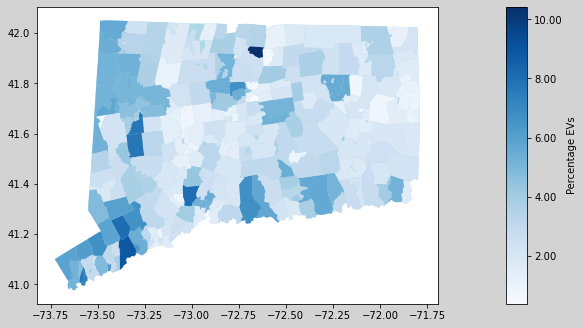

In [96]:
# Create figure
fig, ax = plt.subplots(nrows =1, ncols = 1, figsize = (10,10), facecolor = 'lightgrey')

# Create divider
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "4%", pad = 0)

# Add plots
ct_bg = ct_gdf_2.plot(ax=ax, facecolor = 'lightblue')

# Add zips and sales
ct_zips_ev_pctg.plot(ax=ax,
                    column = "Percentage",
                    cmap = 'Blues',
                    
                    cax = cax,
                    legend = True,
                    legend_kwds={"label": "Percentage EVs",
                                  "pad" : 0,
                                    'format':"%.2f"})

Text(0.5, 0.01, 'Source: NREL Alternative Fuels Data Center Database')

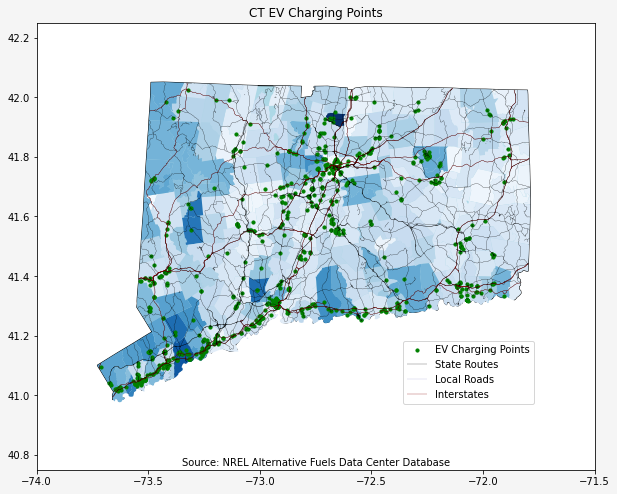

In [105]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,10), facecolor = 'whitesmoke')

# Set axes sizes
ax.set_ylim(40.75, 42.25)
ax.set_xlim(-74, -71.5)

# Plot state and points
# Plot state boundaries
ct_gdf_2.plot(ax=ax, color = 'lightblue', edgecolor = 'black')

# Add zips and sales
ct_zips_ev_pctg.plot(ax=ax,
                    column = "Percentage",
                    cmap = 'Blues',
                    
                    cax = cax,
                    legend = True,
                    legend_kwds={"label": "Percentage EVs",
                                  "pad" : 0,
                                    'format':"%.2f"})

# Plot DCFC points
afdc_plot = data_df_geo.plot(ax=ax, 
                color = 'green', 
                markersize =10,
                label = "EV Charging Points")

# Plot state routes
state_routes_plot = state_routes.plot(ax=ax, color = 'black', linewidth = 0.25, label = "State Routes")

# Plot local roads
local_roads_plot = local_roads.plot(ax=ax, color = 'darkblue', linewidth = 0.1, label = "Local Roads")

# Plot interstates and US routes
interstates_plot = interstates.plot(ax=ax, color ='darkred', linewidth = 0.3, label = "Interstates")

# We get our handles and labels
handles, labels = ax.get_legend_handles_labels()

# Choose to place this within the figure, not within the axes
ax.legend(handles, labels, loc = 'upper right', bbox_to_anchor = (0.9, 0.3))

ax.set_title("CT EV Charging Points")
plt.text(s = "Source: NREL Alternative Fuels Data Center Database",
         x = 0.5,
         y= 0.01,
         transform=ax.transAxes,
         horizontalalignment='center')